# Observations
1. The temperature (max temperature) is higher the closer you get to the equator. We see this in our Latitude vs Temperature plot. 
2. There is no coorelation between humidity and latitude. We see this on all three of our plots comparing latitude and humidity.
3. 

In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#Import API key
#from api_keys import weather_api_key
api_key = ""


#Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (CSV)
output_data_file = "../../../../working/06-Python-APIs/Homework/Instructions/output_data/cities.csv"

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Put out data into a dataframe so we can see it
output_data_file_df = pd.read_csv(output_data_file)
output_data_file_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


# Generate Cities List

In [3]:
#Create empty lists to hold lat_longs and cities
lat_lngs = []
cities = []

In [4]:
#Create a set of random latitude and longitude coordinates
lats = np.random.uniform(lat_range[0], lat_range[1], size = 20)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 20)
lat_lngs = zip(lats, lngs)

In [5]:
#Identify nearest city for each lat, long coordinate
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city name is not already in our cities list, add it
    if city not in cities:
        cities.append(city)
        
len(cities)

19

In [6]:
#API Call for our cities
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL that we will use in our for loop
query_url = f"{url}appid={api_key}&units={units}&q=" 

In [7]:
#Creating empty lists to add info from our API to convert to a dataframe
lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
country = []
date = []
new_cities = []

#Start count and set count for our city output
count = 0
set_count = 1

#Creating a for loop to generate the url for all of our cities and store data
for city in cities:
    
    try:
        #Finding url for all of our cities
        response = requests.get(query_url + city)
        response_json = response.json()

        #Printing our cities
        print(f"Processing {count} of Set {set_count} | {city}")
        
        #Adjusting counter for our count and set count
        count += 1
        if count == 10:
            count = 0
            set_count += 1
          
        #Adding to our lists for our dataframe
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloud.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        new_cities.append(response_json['name'])
    
    #Passing on cities that are not found 
    except:
        pass
        print("City not found. Skipping...")


Processing 0 of Set 1 | barra do garcas
Processing 1 of Set 1 | pisco
Processing 2 of Set 1 | upernavik
Processing 3 of Set 1 | kotma
Processing 4 of Set 1 | bengkulu
Processing 5 of Set 1 | umzimvubu
City not found. Skipping...
Processing 6 of Set 1 | avarua
Processing 7 of Set 1 | geraldton
Processing 8 of Set 1 | ambanja
Processing 9 of Set 1 | alofi
Processing 0 of Set 2 | cape town
Processing 1 of Set 2 | mount gambier
Processing 2 of Set 2 | kruisfontein
Processing 3 of Set 2 | attawapiskat
City not found. Skipping...
Processing 4 of Set 2 | lebu
Processing 5 of Set 2 | tuktoyaktuk
Processing 6 of Set 2 | oussouye
Processing 7 of Set 2 | codrington
Processing 8 of Set 2 | mar del plata


In [8]:
#Create a dataframe with city information

city_df = pd.DataFrame(
    {"City": new_cities,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Humidity": humidity,
     "Cloudiness": cloud,
     "Wind Speed": wind_speed,
     "Country": country,
     "Date": date
    }      
)

city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barra do Garças,-15.8900,-52.2567,27.00,65,0,0.75,BR,1619824090
1,Pisco,-13.7000,-76.2167,20.00,77,0,7.72,PE,1619824090
2,Upernavik,72.7868,-56.1549,-1.68,80,100,2.28,GL,1619823870
3,Kotma,23.2000,81.9667,24.58,17,7,1.34,IN,1619823969
4,Bengkulu,-3.8004,102.2655,23.69,88,95,2.21,ID,1619824091
5,Avarua,-21.2078,-159.7750,27.00,74,40,3.09,CK,1619824091
6,Geraldton,-28.7667,114.6000,11.00,62,41,3.60,AU,1619823858
7,Ambanja,-13.6833,48.4500,23.38,92,9,1.47,MG,1619824092
8,Alofi,-19.0595,-169.9187,28.00,78,75,1.03,NU,1619824092
9,Cape Town,-33.9258,18.4232,14.44,77,0,4.63,ZA,1619823510


In [12]:
#city_df.to_csv("city_info.csv", encoding="utf-8", index = False)


In [13]:
#Determining if any of our cities have over 100% humidity
humidity_percent = city_df.loc[city_df["Humidity"] > 100]
humidity_percent

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [14]:
#If there is humidity over 100, drop it

# Plots

### Latitude and Max Temp

Text(0, 0.5, 'Max Temperature')

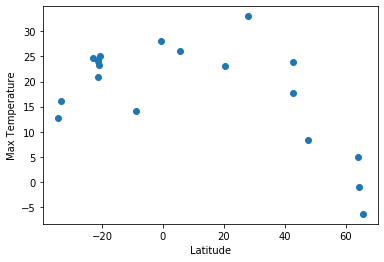

In [18]:
#Scatter plot for latitude and max temp
plt.scatter(city_df["Lat"], city_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs Max Temperature (C)")

### Observations for Latitude and Max Temp
As the latitude gets closer to 0, the temperate increases. Then as the latitude increases, the max temperature decreases. What this is telling us is that as you get closer to the equator the max temperate increases and as you get farther away the max temperature is lower.

### Latitude and Percent Humidity

Text(0, 0.5, 'Percent Humidity')

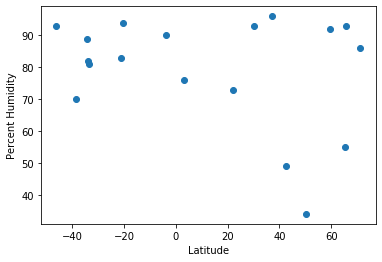

In [9]:
#Scatter plot for Lat and humidity
plt.scatter(city_df["Lat"], city_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Percent Humidity")
plt.title("City Latitude vs Percent Humidity")

### Observation for Latitude and Percent Humidity
As the you get closer to the equator the percent humidity is lower and as you go farther away the humidity gets higher.

### Latitude and Percent Cloudiness

Text(0, 0.5, 'Percent Cloudiness')

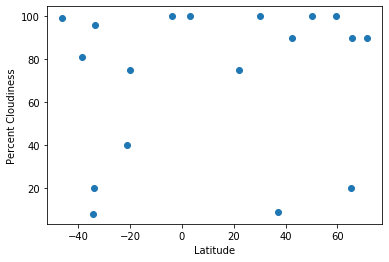

In [11]:
#Scatter plot for Lat and cloudiness
plt.scatter(city_df["Lat"], city_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Percent Cloudiness")
plt.title("City Latitude vs Percent Cloudiness")

### Observation for Latitude and Percent Cloudiness
There is no coorelation between latitude and percent cloudiness.

### Latitude and Wind Speed

Text(0, 0.5, 'Wind Speed')

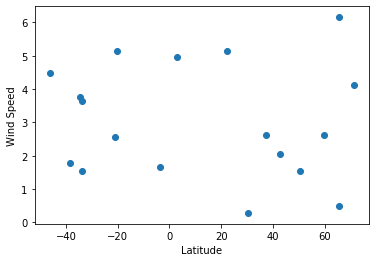

In [12]:
#Scatter plot for Lat and wind speed
plt.scatter(city_df["Lat"], city_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed (mph)")

### Observations of Latitude and Wind Speed
There is little to no coorelation between latitude and wind speed. As the latitude gets close to 40 and increases, there are more cities with higher wind speeds. However, overall there is not a strong coorelation.

In [27]:
#New DataFrame for Northern Hemisphere
northern_hem_df = city_df.loc[city_df["Lat"] >= 0]
northern_hem_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Mogadishu,2.0371,45.3438,28.26,75,39,4.88,SO,1619556242
5,Belle Fourche,44.6714,-103.8522,9.00,71,100,1.54,US,1619556366
6,Longyearbyen,78.2186,15.6401,-8.00,62,75,1.54,SJ,1619556417
7,Albany,42.6001,-73.9662,20.00,19,93,0.92,US,1619556004
9,Vila Franca do Campo,37.7167,-25.4333,15.00,82,75,4.63,PT,1619556266
12,Kapaa,22.0752,-159.3190,26.67,83,1,2.57,US,1619556149
13,Torbay,47.6666,-52.7314,8.00,93,90,5.14,CA,1619556510
14,Cabo San Lucas,22.8909,-109.9124,27.78,49,1,10.29,MX,1619556209
15,Bratsk,56.1325,101.6142,-2.00,37,10,2.00,RU,1619556267
16,Clyde River,70.4692,-68.5914,-1.00,69,40,5.14,CA,1619556268


In [43]:
#New DataFrame for Southern Hemisphere
southern_hem_df = city_df.loc[city_df["Lat"] < 0]
southern_hem_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,13.57,74,0,4.89,CL,1619444329
3,Alta Floresta,-9.8756,-56.0861,24.00,100,90,1.54,BR,1619444330
5,Atuona,-9.8000,-139.0333,26.44,69,100,6.26,PF,1619444331
8,Bambous Virieux,-20.3428,57.7575,26.00,78,75,7.20,MU,1619444331
9,Puerto Ayora,-0.7393,-90.3518,24.52,82,19,3.25,EC,1619444332
...,...,...,...,...,...,...,...,...,...
672,Natal,-5.7950,-35.2094,30.00,62,75,7.20,BR,1619444546
675,Bom Jesus,-9.0744,-44.3586,31.70,48,98,2.48,BR,1619444547
677,Talcahuano,-36.7167,-73.1167,13.00,82,40,4.63,CL,1619444548
679,Gobabis,-22.4500,18.9667,26.99,17,0,5.41,NA,1619444548


### Northern Hemisphere- Max Temp vs. Latitude Linear Regression

The r-value is: -0.8423576106084786


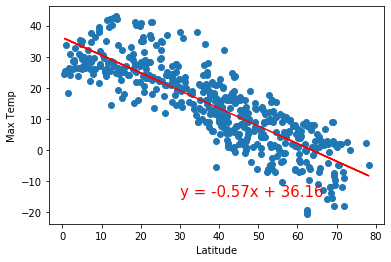

In [44]:
#Linear Regression for latitude and max temp for northern hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,-15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}") 
plt.show()

### Observations
There is a negative coorelation between latitude and max temperature in the northern hemisphere.

### Southern Hemisphere- Max Temp vs. Latitude Linear Regression

The r-value is: 0.7630958218736345


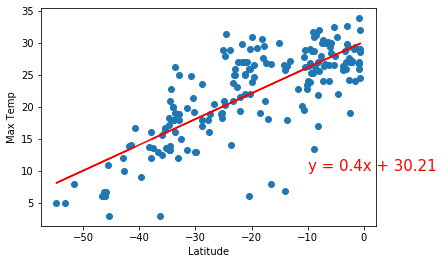

In [45]:
#Linear Regression for latitude and max temp for southern hemisphere

x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}") 
plt.show()

### Observation
There is a positive coorelation between latitude and max temp in the southern hemisphere.

### Northern Hemisphere- Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.20023164672802776


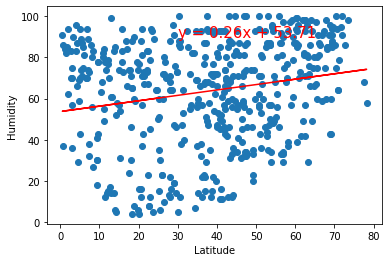

In [46]:
#Linear Regression for latitude and humidity for northern hemisphere

x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}") 
plt.show()

### Observations
There is no coorelation between humidity and latitude in the northern hemisphere.

### Southern Hemisphere- Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.025288332440544625


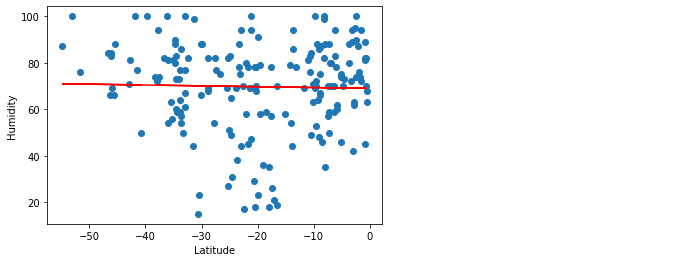

In [47]:
#Linear Regression for latitude and humidity for southern hemisphere

x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}") 
plt.show()

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09794002348941289


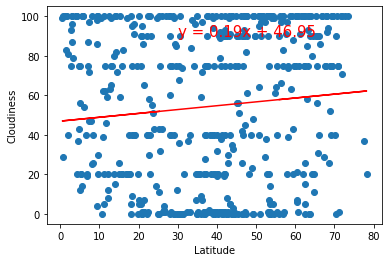

In [48]:
#Linear Regression for latitude and cloudiness for northern hemisphere

x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}") 
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13943322458766036


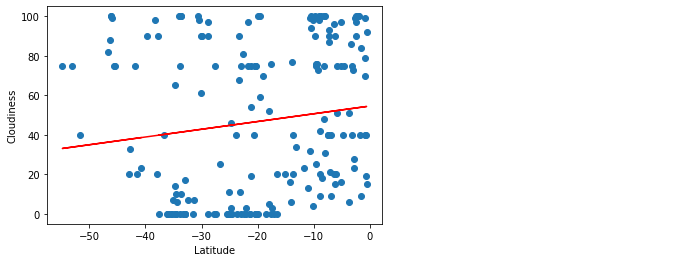

In [49]:
#Linear Regression for latitude and cloudiness for southern hemisphere

x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}") 
plt.show()

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12642775135831585


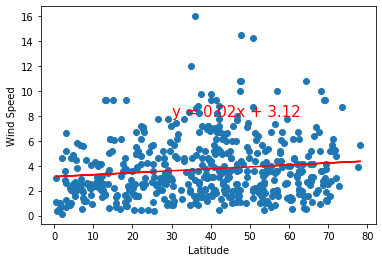

In [50]:
#Linear Regression for latitude and wind speed for northern hemisphere

x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}") 
plt.show()

The r-value is: 0.007930322008873199


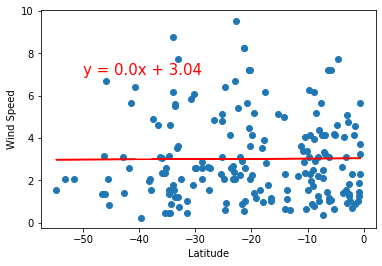

In [51]:
#Linear Regression for latitude and wind speed for southern hemisphere

x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}") 
plt.show()